In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [12]:
df =pd.read_csv('adult.test',sep=',',header=None)

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [14]:
names =['age',
        'workclass',
        'fnlwgt',
        'education',
        'education-num',
        'marital-status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'capital-gain',
        'capital-loss',
        'hours-per-week',
        'native-country','income']

In [15]:
df.columns=names

In [16]:
df2=df.copy()

In [17]:
df2.columns =df2.columns.str.replace('-','_')

In [18]:
df2['income']=df2['income'].str.lstrip()

In [19]:
df2['income'].unique()

array(['<=50K.', '>50K.'], dtype=object)

In [20]:
df2['income']=df2['income'].map({'<=50K.':0,'>50K.':1})

In [21]:
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [24]:
df2=df2.replace(' ?',np.nan)

In [25]:
df2.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

# Ordinal Encoding

In [26]:
df3=df2.copy()

In [28]:
labels_ordered= df3['education'].value_counts().sort_values().index
labels_ordered ={k:i for i,k in enumerate(labels_ordered,0) }
labels_ordered

{' Preschool': 0,
 ' 1st-4th': 1,
 ' 5th-6th': 2,
 ' Doctorate': 3,
 ' 12th': 4,
 ' 9th': 5,
 ' Prof-school': 6,
 ' 7th-8th': 7,
 ' 10th': 8,
 ' Assoc-acdm': 9,
 ' 11th': 10,
 ' Assoc-voc': 11,
 ' Masters': 12,
 ' Bachelors': 13,
 ' Some-college': 14,
 ' HS-grad': 15}

In [29]:
lables=['workclass','education','marital_status','occupation','relationship','race','sex','native_country']
for i in lables:
    labels_ordered= df3[i].value_counts().sort_values().index
    labels_ordered ={k:i for i,k in enumerate(labels_ordered,0) }
    df3[i]=df3[i].map(labels_ordered)

In [30]:
df3

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,7.0,226802,10,7,5,7.0,3,3,1,0,0,40,39.0,0
1,38,7.0,89814,15,9,6,3.0,5,4,1,0,0,50,39.0,0
2,28,5.0,336951,9,12,6,2.0,5,4,1,0,0,40,39.0,1
3,44,7.0,160323,14,10,6,7.0,5,3,1,7688,0,40,39.0,1
4,18,NaN,103497,14,10,5,NaN,3,4,0,0,0,30,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,7.0,215419,13,13,4,13.0,4,4,0,0,0,36,39.0,0
16277,64,NaN,321403,15,9,3,NaN,0,3,1,0,0,40,39.0,0
16278,38,7.0,374983,13,13,6,13.0,5,4,1,0,0,50,39.0,0
16279,44,7.0,83891,13,13,4,9.0,3,2,1,5455,0,40,39.0,0


In [31]:
df3.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

# Handle missing value

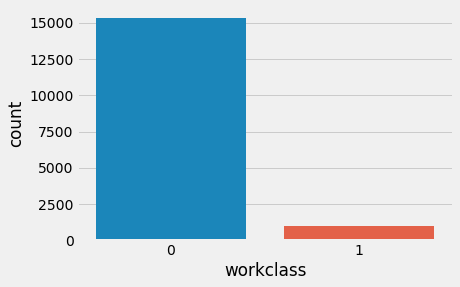

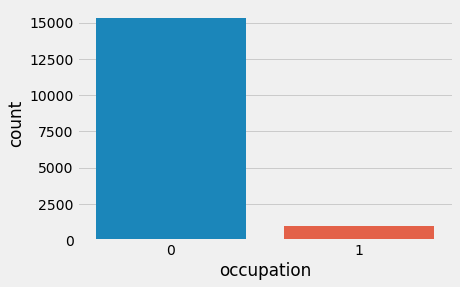

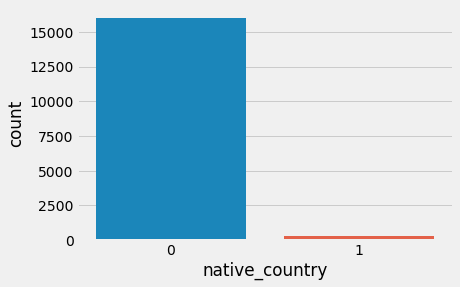

In [32]:
data = df3.copy()
for i in ['workclass','occupation','native_country']:
    data[i]=np.where(data[i].isnull(),1,0)
    sns.countplot(data[i])
    plt.show()

In [33]:
df4=df3.copy()

In [34]:
for i in ['workclass','occupation','native_country']:
    df4[i]=df4[i].fillna(df4[i].median())

In [35]:
df4.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [36]:
df4

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,7.0,226802,10,7,5,7.0,3,3,1,0,0,40,39.0,0
1,38,7.0,89814,15,9,6,3.0,5,4,1,0,0,50,39.0,0
2,28,5.0,336951,9,12,6,2.0,5,4,1,0,0,40,39.0,1
3,44,7.0,160323,14,10,6,7.0,5,3,1,7688,0,40,39.0,1
4,18,7.0,103497,14,10,5,10.0,3,4,0,0,0,30,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,7.0,215419,13,13,4,13.0,4,4,0,0,0,36,39.0,0
16277,64,7.0,321403,15,9,3,10.0,0,3,1,0,0,40,39.0,0
16278,38,7.0,374983,13,13,6,13.0,5,4,1,0,0,50,39.0,0
16279,44,7.0,83891,13,13,4,9.0,3,2,1,5455,0,40,39.0,0


# Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(df4),columns=df4.columns)

In [41]:
scaled_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.109589,1.000000,0.144430,0.666667,0.400000,0.833333,0.538462,0.6,0.75,1.0,0.000000,0.0,0.397959,1.0,0.0
1,0.287671,1.000000,0.051677,1.000000,0.533333,1.000000,0.230769,1.0,1.00,1.0,0.000000,0.0,0.500000,1.0,0.0
2,0.150685,0.714286,0.219011,0.600000,0.733333,1.000000,0.153846,1.0,1.00,1.0,0.000000,0.0,0.397959,1.0,1.0
3,0.369863,1.000000,0.099418,0.933333,0.600000,1.000000,0.538462,1.0,0.75,1.0,0.076881,0.0,0.397959,1.0,1.0
4,0.013699,1.000000,0.060942,0.933333,0.600000,0.833333,0.769231,0.6,1.00,0.0,0.000000,0.0,0.295918,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,1.000000,0.136723,0.866667,0.800000,0.666667,1.000000,0.8,1.00,0.0,0.000000,0.0,0.357143,1.0,0.0
16277,0.643836,1.000000,0.208484,1.000000,0.533333,0.500000,0.769231,0.0,0.75,1.0,0.000000,0.0,0.397959,1.0,0.0
16278,0.287671,1.000000,0.244762,0.866667,0.800000,1.000000,1.000000,1.0,1.00,1.0,0.000000,0.0,0.500000,1.0,0.0
16279,0.369863,1.000000,0.047666,0.866667,0.800000,0.666667,0.692308,0.6,0.50,1.0,0.054551,0.0,0.397959,1.0,0.0


In [42]:
scaled_data.to_csv('cleaned_test.csv',index=False)

In [43]:
df4.to_csv('wthout_scaled_test.csv',index=False)

In [45]:
from sklearn.preprocessing import RobustScaler
scaler2 = RobustScaler()
robust_scaled_test=pd.DataFrame(scaler2.fit_transform(df4),columns=df4.columns)

In [47]:
robust_scaled_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,-0.60,0.0,0.402563,-1.333333,-1.000000,0.0,-1.000000,-0.5,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.05,0.0,-0.723538,0.333333,-0.333333,1.0,-2.333333,0.5,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,-0.45,-2.0,1.308036,-1.666667,0.666667,1.0,-2.666667,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.35,0.0,-0.143923,0.000000,0.000000,1.0,-1.000000,0.5,-1.0,0.0,7688.0,0.0,0.0,0.0,1.0
4,-0.95,0.0,-0.611058,0.000000,0.000000,0.0,0.000000,-0.5,0.0,-1.0,0.0,0.0,-2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.10,0.0,0.308990,-0.333333,1.000000,-1.0,1.000000,0.0,0.0,-1.0,0.0,0.0,-0.8,0.0,0.0
16277,1.35,0.0,1.180225,0.333333,-0.333333,-2.0,0.000000,-2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
16278,0.05,0.0,1.620676,-0.333333,1.000000,1.0,1.000000,0.5,0.0,0.0,0.0,0.0,2.0,0.0,0.0
16279,0.35,0.0,-0.772228,-0.333333,1.000000,-1.0,-0.333333,-0.5,-2.0,0.0,5455.0,0.0,0.0,0.0,0.0


In [48]:
robust_scaled_test.to_csv('robust_scaler_test.csv',index=False)